## Analyzing the Stroop Effect

### Background Information  
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example "RED" with red color, "BLUE" with bule color. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example "PURPLE" in not-purple color, "ORANGE" in not -orange color. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

#### My test result: Congruent: 10.25s, Incongruent: 30.13s  

**(1) What is the independent variable? What is the dependent variable?**

Independent variable: congruent group where words and colors are congruent & incongruent words where words and colors are incongruent  

Dependent variable: time used to name ink colors in lists

**(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.**

 ### Reasons of choosing **Paired t test**  
+ We know the sample but don't know the std
+ The sample size is less than thirty. 
+ The sample is two kinds of experiment data for each participant (same population), so that each pair of observations is closely related. 

*There are three types of t test, such as **one sample t test, two samples t test & paired t test.** * 

 ### Reasons of choosing **two-tailed test**  
**Two-tailed test with the significant level α = 0.05** becasue I only care whether there exists Stroop Effect or no. I don't have to test the which kind of experiment cost more time, even though I can notice that Incongruent group has a high mean of time used to name ink colors for the given sample.   
α =0.05 is the standard significant level used in the hypothesis test.

### Set Null hypothesis & Altervative hypothesis
+ **Null hypothesis H0: μ_c=μ_i**, the mean of time used to name the congruent words μ_c is same as that of time used to name the incongruent words μ_i, which means there is no Stroop Effect   
+ **Altervative hypothesis H1: μ_c≠μ_i**, the mean of time used to name the congruent words μ_c is different from that of time used to name the incongruent words μ_i, which means there exists Stroop Effect  

### Test **assumpotions of the paired t test:**  
+ The dependent variable (DV) must be continuous which is measured on an **interval or ratio scale**;
+ The DV should be approximately normally distributed:
    + Testing for normality needs to be conducted on the **differences between the two conditions**, not the raw values of each condition itself;
    + **The paired sample t-test is robust to this violation. If there is a violation of normality, as long as it’s not in a major violation the test results can be considered valid**;
+ The DV should not contain any significant outliers.

pvalue = 0.0360 , which is less than α=0.05, so we reject H0. Thus, difference is not normally-distributed.


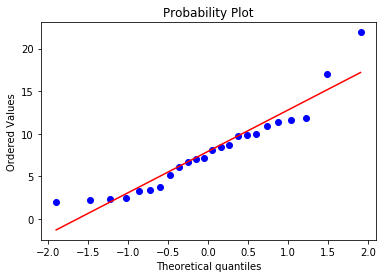

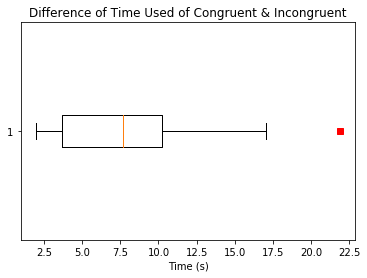

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab 

from scipy.stats import ttest_ind
from scipy import stats

df = pd.read_csv('stroopdata.csv')

df['difference'] =  df['Incongruent'] - df['Congruent']
# Normaltest is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality.
# H0 is that the data is normally-distributed.
pvalue = stats.shapiro(df['difference'])[1]
print('pvalue = %.4f , which is less than α=0.05, so we reject H0. Thus, difference is not normally-distributed.'% pvalue)
stats.probplot(df['difference'], dist="norm", plot=pylab)
pylab.show()

# Boxplot to detect outliers again
plt.boxplot(df['difference'], sym='rs', vert=False)
plt.title('Difference of Time Used of Congruent & Incongruent')
plt.xlabel('Time (s)')

plt.show()

### Observation
From the Q-Q plot and the box plot of difference between two experiment groups, the given sample doesn't not pass the assumption.

### Approaches to address non-normality

+ Remove outliers: **arbitrary removal** is dangerous, because we force the data to conform to some **preconceived notion** as to what data should look like.  
+ **Ignore the normality assumption**: T test is **robust to non normal distribution** if the sample is approximate normality (not strictly normal) and the shape is close to a bell shape rather than a bimodal/multimodal/massive skewed shape. If the test running is not sensitive to normality, we may still run it even if the data are not normal.
+ Transformations: transform the sample by math fucntions to convert left or right skewed dataset into normal.  
```np.sqrt(df['difference'])```
+ Bootstrapping: resampling with repalcement maintains data structure but reshuffles values, extrapolating to the population.
    + process: sample values with replacement and calculate mean; repate n times; generate **sampling distribution of sample means**.  
    ```np.random.choice(df['difference'], size=df['difference'].shape)```
+ Non-parametric statistical test: non-parametric tests do not assume that the data fit the normal distribution. However; if different groups have different shaped distributions (for example, one is skewed to the left, another is skewed to the right), a non-parametric test may not be any better than a parametric one. Every parametric statistical test has a non-parametric substitute, such as:
    + **Kruskal–Wallis test** instead of a **one-way anova**, 
    + **Wilcoxon signed-rank test** instead of a **paired t-test**, 
    + **Mann-Whitney U test** instead of a **one/two sample t test**
    + **Spearman rank correlation** instead of the **linear regression**.   
    

    
### Conclusion
**Wilcoxon signed-rank test** is a proper statistical test for this sample.  
<u>*I will transform the sample and apply t test in the end.*</u>

**(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.**

In [27]:
df.describe()

,Congruent,Incongruent,difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


In [28]:
# Except for describe table data, there are other mesurements: median, range, IQR, difference

# Central tendency:
print('Congreunt median: %.4f    Incongreunt median: %.4f' %(df['Congruent'].median(), df['Incongruent'].median()))

# Variability:
range_c = df['Congruent'].max()-df['Congruent'].min()
range_i = df['Incongruent'].max()-df['Incongruent'].min()
iqr_c = df['Congruent'].quantile(0.75)-df['Congruent'].quantile(0.25)
iqr_i = df['Incongruent'].quantile(0.75)-df['Incongruent'].quantile(0.25)

print('Congreunt range: %.4f    Incongreunt range: %.4f' %(range_c, range_i))
print('Congreunt IQR: %.4f    Incongreunt IQR: %.4f' %(iqr_c, iqr_i))
print('Congreunt std: %.4f    Incongreunt std: %.4f' %(df['Congruent'].std(), df['Incongruent'].std()))

df.head() #show difference

Congreunt median: 14.3565    Incongreunt median: 21.0175
Congreunt range: 13.6980    Incongreunt range: 19.5680
Congreunt IQR: 4.3055    Incongreunt IQR: 5.3347
Congreunt std: 3.5594    Incongreunt std: 4.7971


,Congruent,Incongruent,difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


**(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.**

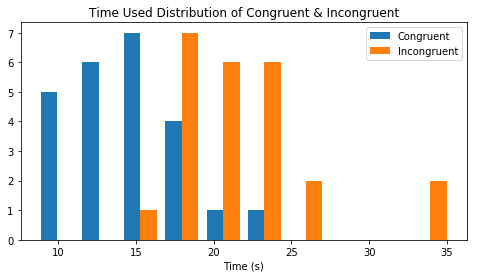

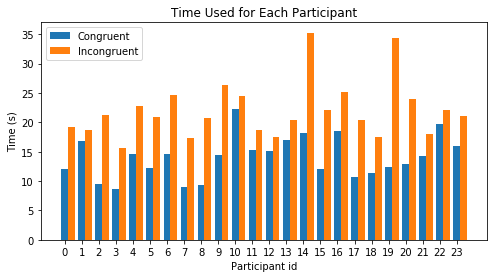

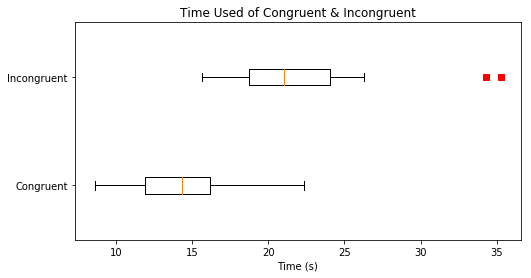

In [29]:
experiments = [df['Congruent'], df['Incongruent']]

# Histgram: plot quantitative data with ranges of the data grouped into bins or intervals
plt.figure(figsize=(8,4))
plt.hist(experiments, label=['Congruent', 'Incongruent'])
plt.title('Time Used Distribution of Congruent & Incongruent')
plt.xlabel('Time (s)')
plt.legend()

# Bar Chart: plot categorical data
x = df.index.tolist()
ind = np.arange(df.count()[0])
width = 0.4

plt.figure(figsize=(8,4))
plt.bar(ind, df['Congruent'], width, label = 'Congruent')
plt.bar(ind+width, df['Incongruent'], width, label = 'Incongruent')
plt.title('Time Used for Each Participant')
plt.ylabel('Time (s)')
plt.xlabel('Participant id')
plt.xticks(x)
plt.legend()

# Boxplot
plt.figure(figsize=(8,4))
plt.boxplot(experiments, sym='rs', vert=False)
plt.title('Time Used of Congruent & Incongruent')
plt.yticks([1, 2, ], ['Congruent', 'Incongruent'])
plt.xlabel('Time (s)')
plt.legend()

plt.show()

### Oberservation
Time used in incongruent is large than that in congruent regarding each participant. The median of the incongruent experiment is larger than that of the congruent experiment. Also, there are two obvious ouliers in the incongruent experiment while there is no outlier for the congruent one. Outliers skew the true mean of incongruent values. If we remove outliers, these two groups are normally-distributed respectively.

**(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? Hint: Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.**

## Handle Non Normality I:  
### Wilcoxon signed-rank test: pseudo code for understanding  
+ Calculate difference between two groups: ```df['difference'] = df['Incongruent'] - df['Congruent']```  
+ Take the absolute value of the difference: ```df['abs'] = np.abs(df['difference'])```  
+ Rank abs from the smallest to the largest: ```scipy.stats.rankdata ``` ;   ```df['rank'] = rankdata(df['abs'])```
+ Sum the rank of the neg difference & that of the pos difference: ```posRank = df.loc[df['difference'] > 0 ]```;```negRank = df.loc[df['difference'] < 0]```
    + ```pr = posRank['rank'].sum()```; ```nr = negRank['rank'].sum()```
+ Take the smaller one as **T statistic** from posRank and negRank: ```min(pr, nr)```
+ Find **T critical** values based on the case: n = 24, α = 0.05, two_tailed test, (right tail case)
    + If T statistic < T critical, p < 0.05, reject H0; **Opposite result of relations between the critical value & the statistic, comparing with T test**
    + If T statistic > T critical, p > 0.05, fail to reject H0

In [30]:
wilcoxon = stats.wilcoxon(df['Congruent'],df['Incongruent'])
print('pvalue = %f less than α=0.05, so we reject H0. Thus, there exist the Stroop Effect in congruent and incongruent groups of data.'% wilcoxon.pvalue)

pvalue = 0.000018 less than α=0.05, so we reject H0. Thus, there exist the Stroop Effect in congruent and incongruent groups of data.


### Conclusion
Type I error is equal to α, which is the significant level, indicating incorrect rejection of a true null hypothesis.  
The pvalue = 0.000018 less than α=0.05, so we reject H0. Thus, there exist the Stroop Effect in congruent and incongruent groups of data.  
The result matches up with my expectations.

## Handle Non Normality II:  
### Transform Difference to Normal for the Paired T Test

pvalue = 0.4186 , which is larger than α=0.05, so we fail tp reject H0. Thus, the transformed difference is normally-distributed.


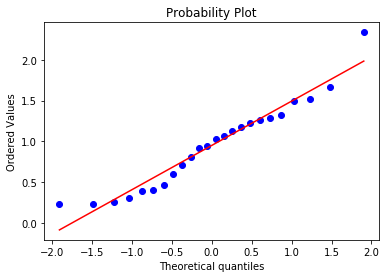

In [31]:
# Transformation
t_c = np.sqrt(df['Congruent'])
t_i = np.sqrt(df['Incongruent'])
df['transformed'] = t_i - t_c

# Normality test 
pvalue = stats.normaltest(df['transformed']).pvalue
print('pvalue = %.4f , which is larger than α=0.05, so we fail tp reject H0. Thus, the transformed difference is normally-distributed.'% pvalue)
stats.probplot(df['transformed'], dist="norm", plot=pylab)
pylab.show()

### Confidence interval:
+ Find **t critical** values based on the case: df = n - 1 = 24 - 1 = 23, α = 0.05, two_tailed test, (right tail case): **t critical = 2.069**
+ Calculate the **confidence interval**: $\bar{X}\pm t_{critical} \times SE(\bar{X}) $
    + $\bar{X}$: mean of difference
    + $SE(\bar{X})  = \frac{S}{\sqrt{n}}$; S: sample standard deviation 

In [32]:
n=24
t_critical = 2.069
xbar = df['transformed'].mean()
s = df['transformed'].std()
sem = np.divide(s, np.sqrt(n))
lower_bound = xbar-t_critical*sem
upper_bound = xbar+t_critical*sem
print('95%% Confidence Interval of transformed sample: (%.4f, %.4f)' % (lower_bound, upper_bound))

95% Confidence Interval of transformed sample: (0.7228, 1.1740)


### Paired t test: t statistic & p value:
 
Since we use the paried t test, our H0 changes to μ=0 & H1 changes to μ≠0, which indicates whether two groups' difference is 0 or not. (whether exists Stroop Effect or not). This is different from the two sample t test because it compares two means from two samples while the paired t test is used to check whether the mean changes for two different experiments on one population or not.  

+ Calculate $t_{statistic}=\frac{\bar{X}-\mu}{SE(\bar{X})}$; μ=0

    + If t statistic > t critical, p < 0.05, reject H0;
    + If t statistic < t critical, p > 0.05, fail to reject H0

In [33]:
# Two_tailed paired t test of the transformed sample with 0.05 siginificant level 
stats.ttest_rel(t_i, t_c)

Ttest_relResult(statistic=8.6990318143841385, pvalue=9.8952413068801949e-09)

### Conclusion
In the case of the siginificant level α = 0.05, two-tailed test, and the degree of freedom df = n - 1 = 24 -1 = 23, the **t critical is 2.069** based on the t table. 
Our t statistic is 8.70, which is larger than t critical (the pvalue is less than α=0.05), so we reject H0. Thus, there exist Stroop Effect between Congruent and Incongruent groups. And 95% confidence Interval of transformed sample: (0.7228, 1.1740)

**(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!**

I believe subconscious leads to a time_used gain in naming the ink color correctly. Since we have already had the concecpt of colors and their words with specific letters, if we name the incongruent group, what we see has a conflit with what we memorized before. The gain of time_used is the time that we spend in handling the conflict.  

## Reference

Stroop Effect experiment: https://faculty.washington.edu/chudler/java/ready.html  
Q_Q plot: https://stats.stackexchange.com/a/101290/211157  
Paired t test: http://blog.minitab.com/blog/statistics-and-quality-data-analysis/t-for-2-should-i-use-a-paired-t-or-a-2-sample-t  
Paired t test assumption: http://www.csic.cornell.edu/Elrod/t-test/t-test-assumptions.html  
Paired t test assumption: https://pythonfordatascience.org/paired-samples-t-test-python/  
Non-normality: http://blog.minitab.com/blog/understanding-statistics-and-its-application/what-should-i-do-if-my-data-is-not-normal-v2  
Handle non-normality: https://stats.stackexchange.com/a/254026/211157  
Resampling (Bootstrap): https://www.youtube.com/watch?v=gcPIyeqymOU  
Wilcoxon signed rank test: https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test  
Wilcoxon signed rank test & robustness: https://stats.stackexchange.com/a/71463/211157  